In [14]:
import sqlite3
import pandas as pd

# Conectar ao banco de dados SQLite
db = "D:/monografia/_dva/db/dva.db"
con = sqlite3.connect(db)

# Definir a consulta SQL
query = """
SELECT 
    ANO,
    'Governo' AS DS_CONTA,
    SUM(Governo)/SUM(VATD) * 100 AS PERCENTUAL
FROM dva_contas
GROUP BY ANO

UNION ALL

SELECT 
    ANO,
    'Pessoal' AS DS_CONTA,
    SUM(Pessoal)/SUM(VATD) * 100 AS PERCENTUAL
FROM dva_contas
GROUP BY ANO

UNION ALL

SELECT 
    ANO,
    'RCP' AS DS_CONTA,
    SUM(RCP)/SUM(VATD) * 100 AS PERCENTUAL
FROM dva_contas
GROUP BY ANO

UNION ALL

SELECT 
    ANO,
    'RCT' AS DS_CONTA,
    SUM(RCT)/SUM(VATD) * 100 AS PERCENTUAL
FROM dva_contas
GROUP BY ANO

ORDER BY ANO;
"""

# Executar a consulta e carregar os dados em um DataFrame do pandas
df = pd.read_sql_query(query, con)

# Fechar a conexão com o banco de dados
con.close()

# Exibir as primeiras linhas do DataFrame
print(df.head())


    ANO DS_CONTA  PERCENTUAL
0  2009  Governo   43.550694
1  2009  Pessoal   19.267963
2  2009      RCP   22.724096
3  2009      RCT   13.720107
4  2010  Governo   41.492863
    ANO DS_CONTA  PERCENTUAL
0  2009  Governo   43.550694
1  2009  Pessoal   19.267963
2  2009      RCP   22.724096
3  2009      RCT   13.720107
4  2010  Governo   41.492863


In [15]:
# Definindo a ordem das categorias na variável 'CONTA'
order = ["Governo", "Pessoal", "RCP", "RCT"]
df['DS_CONTA'] = pd.Categorical(df['DS_CONTA'], categories=order, ordered=True)

# Filtrando o DataFrame para incluir apenas variáveis específicas
selected_variables = ["Governo", "Pessoal", "RCT", "RCP"]
df_filtered = df[df['DS_CONTA'].isin(selected_variables)]

df_filtered.head()

,ANO,DS_CONTA,PERCENTUAL
0,2009,Governo,43.550694
1,2009,Pessoal,19.267963
2,2009,RCP,22.724096
3,2009,RCT,13.720107
4,2010,Governo,41.492863


<positron-console-cell-16>:5: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.


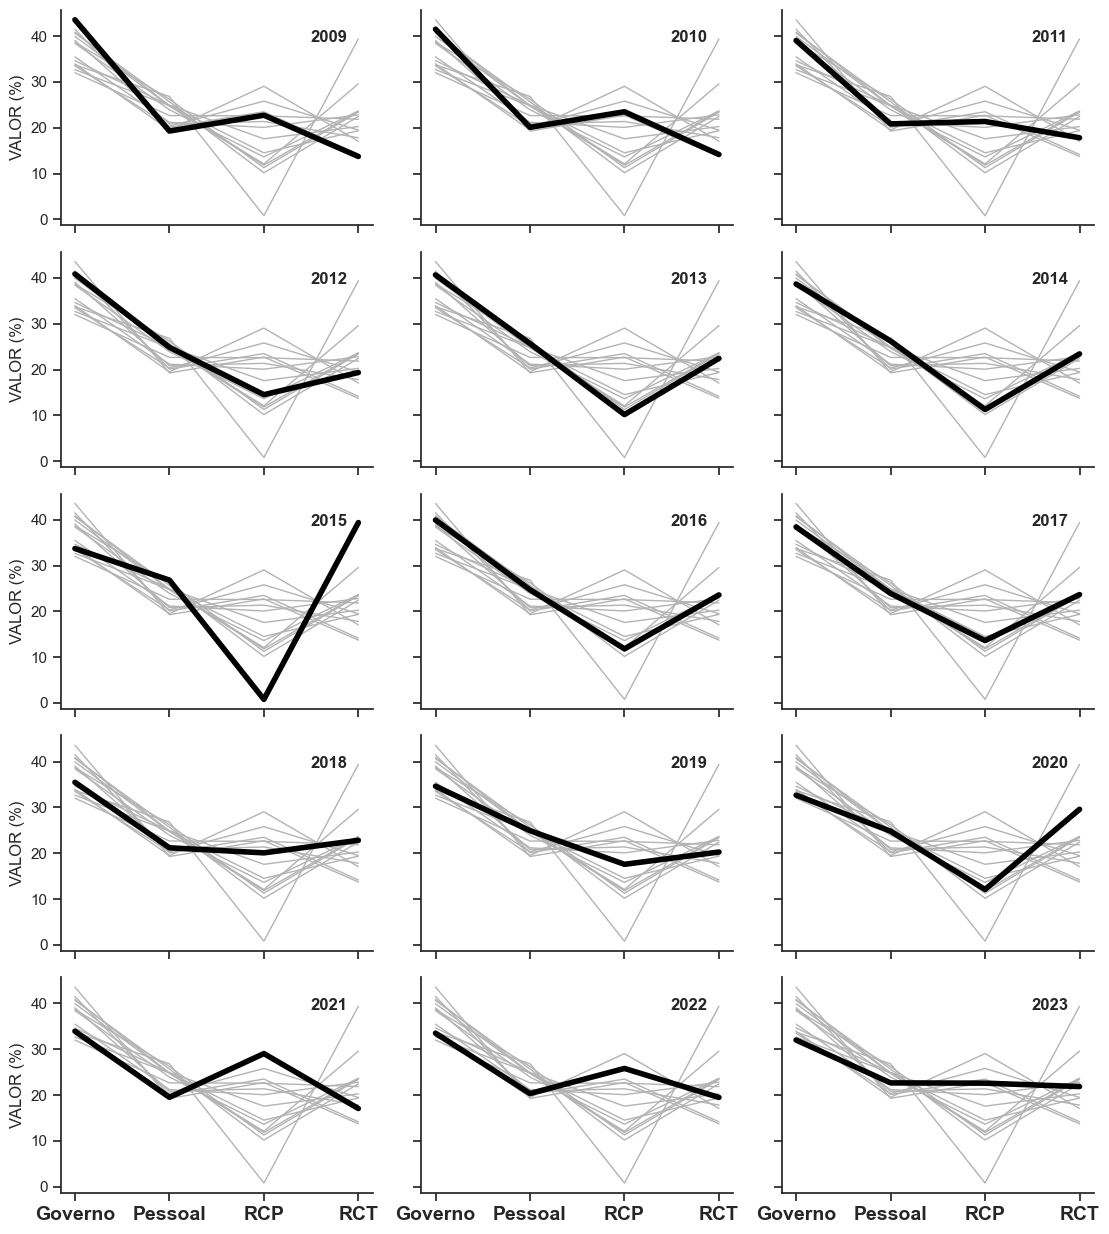

In [16]:
# Ajustando a paleta de cores para ter cores suficientes
palette = sns.color_palette("tab10", n_colors=len(df_filtered['ANO'].unique()))

# Criando o plot com cada ano em seu próprio faceta
g = sns.relplot(
    data=df_filtered,
    x="DS_CONTA", y="PERCENTUAL", col="ANO", hue="ANO",
    kind="line", palette=["black"], linewidth=4, zorder=4,
    col_wrap=3, height=2.5, aspect=1.5, legend=False,
)

# Iterando sobre cada subplot para customizar mais
for year, ax in g.axes_dict.items():

    # Adicionando o título como anotação dentro do plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plotando a série temporal de cada ano no fundo
    sns.lineplot(
        data=df_filtered, x="DS_CONTA", y="PERCENTUAL", units="ANO",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

    # Ajustando os rótulos do eixo X
    ax.set_xticks(range(len(order)))
    ax.set_xticklabels(order, fontsize=14, fontweight='bold')

# Ajustando os aspectos de suporte do plot
g.set_titles("")
g.set_axis_labels("", "VALOR (%)")
g.tight_layout()

# Salvando o plot
# g.savefig("D:/monografia/_dva/.backup/timeseries.png")
